#Clasificación Binaria
En esta primera red se clasificara si un tumor es maligno o no a través de una clasificacoin binaria

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
from google.colab import files
files.upload()

In [0]:
df = pd.read_csv('wcbreast_wdbc.csv', na_values=['NA','?'])

In [13]:
df.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# Codificando el atributo diagnosis
from sklearn import preprocessing
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


df.drop('id',axis=1,inplace=True)
diagnosis = encode_text_index(df,'diagnosis')
num_classes = len(diagnosis)

In [15]:
df.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# Creando x e y para entrenamiento
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    
    # Descubre el tipo da columna de destino. 
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    # Encoding para int. TensorFlow prefiere 32 bits.
    if target_type in (np.int64, np.int32):
        # Classificación
        dummies = pd.get_dummies(df[target])
        return df.values.astype('float32'), dummies.values.astype('float32')
    else:
        # Regresión
        return df.values.astype('float32'), df[target].astype('float32')

x, y = to_xy(df,'diagnosis')

In [0]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [18]:
#red neuronal de clasificación
model = Sequential()
model.add(Dense(10,input_dim=x.shape[1],kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal',))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
monitor = EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor], verbose=0, epochs=1000)

Epoch 00035: early stopping


In [19]:
#midiendo la precisión del modelo
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_compare=np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare,pred)
print(f'Accuracy final {score}')

Accuracy final 0.9370629370629371


##Matriz de confusión 
usada para problemasa de clasificación

Confusion Matrix Sin Normalizar
[[82  7]
 [ 2 52]]
Confusion Matrix Normalizada
[[0.92 0.08]
 [0.04 0.96]]


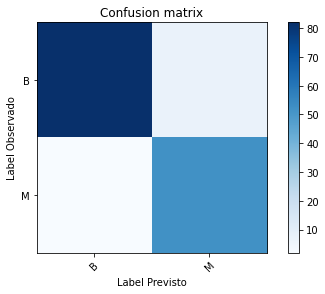

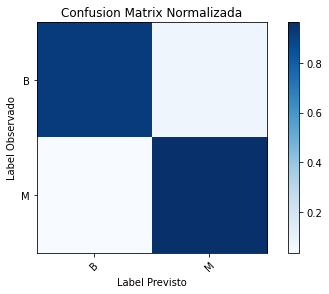

In [22]:
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Label Observado')
    plt.xlabel('Label Previsto')


# Confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion Matrix Sin Normalizar')
print(cm)
plt.figure()
plot_confusion_matrix(cm, diagnosis)

# Normaliza la matriz de confusión por fila (o sea, por el número de muestras en cada clase)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, diagnosis, title='Confusion Matrix Normalizada')

plt.show()

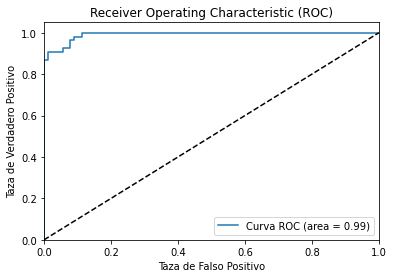

In [25]:
#curva ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label = 'Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taza de Falso Positivo')
    plt.ylabel('Taza de Verdadero Positivo')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

pred = model.predict(x_test)
pred = pred[:,1] # Solamente casos positivos
plot_roc(pred,y_compare)

##Clasificación multiclase

In [27]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

df = pd.read_csv('iris.csv',na_values=['NA','?'])

species = encode_text_index(df,"species")
x,y = to_xy(df,"species")

# Split em treino/teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x,y,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)

Epoch 00388: early stopping


Confusion Matrix sin normalización
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Confusion Matrix Normalizada
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


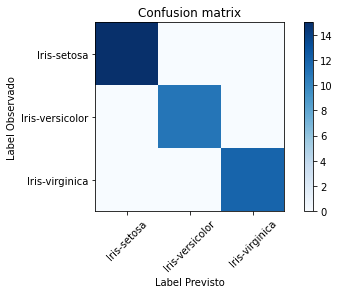

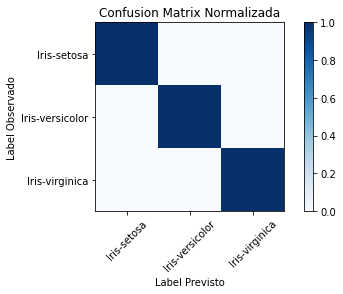

In [28]:
import numpy as np

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test2 = np.argmax(y_test,axis=1)
    
# Confusion matrix
cm = confusion_matrix(y_test2, pred)
np.set_printoptions(precision=2)
print('Confusion Matrix sin normalización')
print(cm)
plt.figure()
plot_confusion_matrix(cm, species)


cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, species, title='Confusion Matrix Normalizada')

plt.show()

##Regresión

In [0]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    
    # Descubre el tipo da columna de destino. 
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    # Encoding para int. TensorFlow prefiere 32 bits.
    if target_type in (np.int64, np.int32):
        # Classificación
        dummies = pd.get_dummies(df[target])
        return df.values.astype('float32'), dummies.values.astype('float32')
    else:
        # Regresión
        return df.values.astype('float32'), df[target].astype('float32')

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='Valor Real')
    b = plt.plot(t['pred'].tolist(),label='Valor Previsto')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [33]:
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping



preprocess = False

df = pd.read_csv('auto-mpg.csv',na_values=['NA','?'])

# Vetor de features
missing_median(df, 'horsepower')
encode_text_dummy(df, 'origin')
df.drop('name',1,inplace=True)

# Normalización
if preprocess:
    encode_numeric_zscore(df, 'horsepower')
    encode_numeric_zscore(df, 'weight')
    encode_numeric_zscore(df, 'cylinders')
    encode_numeric_zscore(df, 'displacement')
    encode_numeric_zscore(df, 'acceleration')

# Datos de entrnamiento
x,y = to_xy(df,'mpg')

# Split en train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x,y,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)



Epoch 00076: early stopping


Score (RMSE): 1.6835709810256958


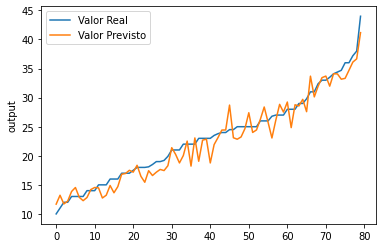

In [36]:
# Predicciones de RMSE
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Plot 
chart_regression(pred.flatten(), y_test.values)